In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
features , true_labels = make_blobs(n_samples=200,centers=3,cluster_std=2.75,random_state=42)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=100,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=100, n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

74.57960106819854

In [ ]:
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [ ]:
kmeans.n_iter_

2

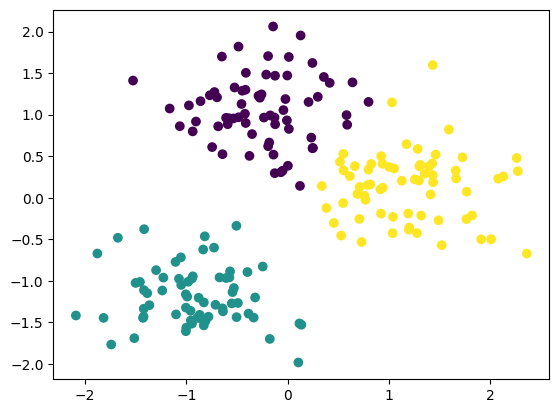

In [ ]:
plt.scatter(scaled_features[:,0],scaled_features[:,1],c=kmeans.labels_)

In [ ]:
inertias=[]
for i in range(1, 11):
  model=KMeans(init="random",n_clusters=i,n_init=10,max_iter=100,random_state=42)
  model.fit(scaled_features)
  inertias.append(model.inertia_)
inertias

[400.0,
 173.2307489387777,
 74.57960106819854,
 61.30474344497751,
 52.2753872590211,
 43.963117678328196,
 38.52881875287544,
 34.826374070261245,
 31.138657464397568,
 27.896572369402648]

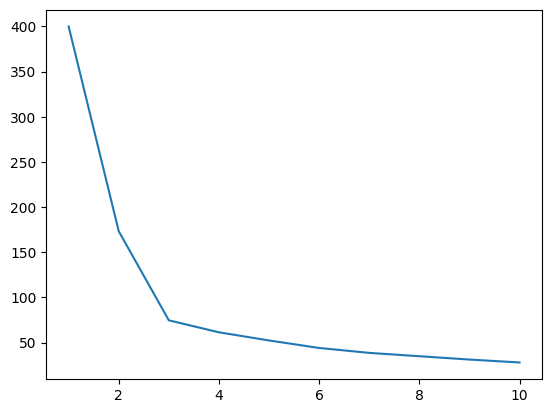

In [ ]:
plt.plot(range(1,len(inertias)+1),inertias)

In [ ]:
silhouette_scores = []
for i in range(2,11):
  model = KMeans(init="random",n_clusters=i,n_init=10,max_iter=100,random_state=42)
  model.fit(scaled_features)
  silhouette_scores.append(silhouette_score(scaled_features,model.labels_))
silhouette_scores

[0.5449728784485278,
 0.5915043942870359,
 0.4916111520533458,
 0.39172760330275125,
 0.36713672897176236,
 0.35326132806361693,
 0.36574407217979027,
 0.3579272766766677,
 0.3607265826184605]

Text(0, 0.5, 'Silhouette Score')

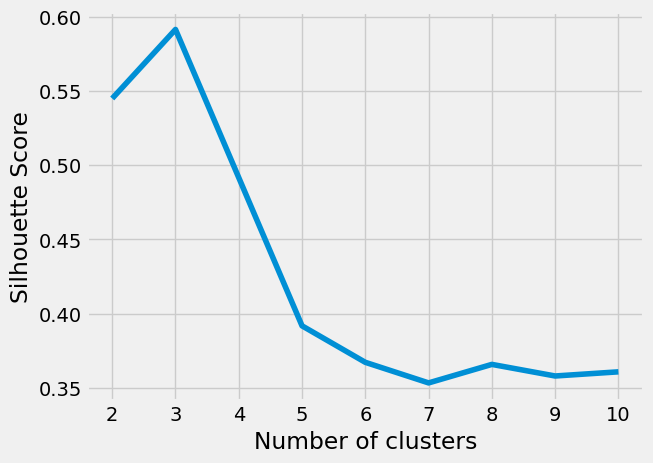

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,len(silhouette_scores)+2),silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

In [ ]:
import tarfile
import urllib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [ ]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

full_download_url = urllib.parse.urljoin(uci_tcga_url , archive_name)

r  = urllib.request.urlretrieve(full_download_url , archive_name)

tar = tarfile.open(archive_name , "r:gz")
tar.extractall()
tar.close()

In [ ]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"
data = np.genfromtxt(datafile,delimiter = "," ,usecols=range(1,20352),skip_header=1)
true_label_names = np.genfromtxt(labels_file,delimiter = "," ,usecols=range(1,),skip_header=1,dtype="str")

In [ ]:
true_label_names[:5]

array(['sample_0', 'sample_1', 'sample_2', 'sample_3', 'sample_4'],
      dtype='<U10')

In [ ]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[:5]

array([  0,   1, 112, 223, 334])

In [ ]:
n_cluster=len(label_encoder.classes_)

In [ ]:
preprocessor = Pipeline([("scaler", MinMaxScaler()), ("pca", PCA(n_components=2, random_state=42))])

In [ ]:
clusterer=Pipeline([("kmeans",KMeans(n_clusters=n_cluster,init="k-means++",n_init=50,max_iter=500,random_state=42))])

In [ ]:
pipe=Pipeline([("preprocessor",preprocessor),("clusterer",clusterer)])

In [ ]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=801,
                                         n_init=50, random_state=42))]))])

In [ ]:
train_uri = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_uri)
test_uri = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_uri)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.drop(["Cabin"],axis=1,inplace=True)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
train.drop(["Age"],axis=1,inplace=True)

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64